In [37]:
import pandas as pd


df = pd.read_excel("2023_data_v2.xlsx")
df

,Title Length,Video Duration,Video Type,Month,Weekday,Hour
0,76,804,Video,1,2,21
1,56,15,Shorts,1,2,16
2,43,59,Shorts,1,2,16
3,50,179,Video,1,2,2
4,83,1031,Video,1,2,1
...,...,...,...,...,...,...
31209,13,207,Music,12,5,1
31210,40,191,Music,12,5,1
31211,16,188,Music,12,5,1
31212,6,116,Music,12,5,1


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


def createHeatMap(videoType):
    pivot_table = df[(df["Video Type"] == videoType)].pivot_table(index='Weekday', columns='Hour', aggfunc='size', fill_value=0)
    # Create the heatmap with adjustments
    plt.figure(figsize=(40, 15))
    sns.heatmap(pivot_table, cmap='Reds', annot=True, annot_kws={"size": 25}, fmt='g')  # Adjusting text size here
    
    # Adding labels and title
    plt.title('Heatmap of Watched Content by Hour and Weekday, Format of Video: ' + videoType)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Day of the Week')
    plt.yticks(ticks=range(1,8), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
    plt.show()


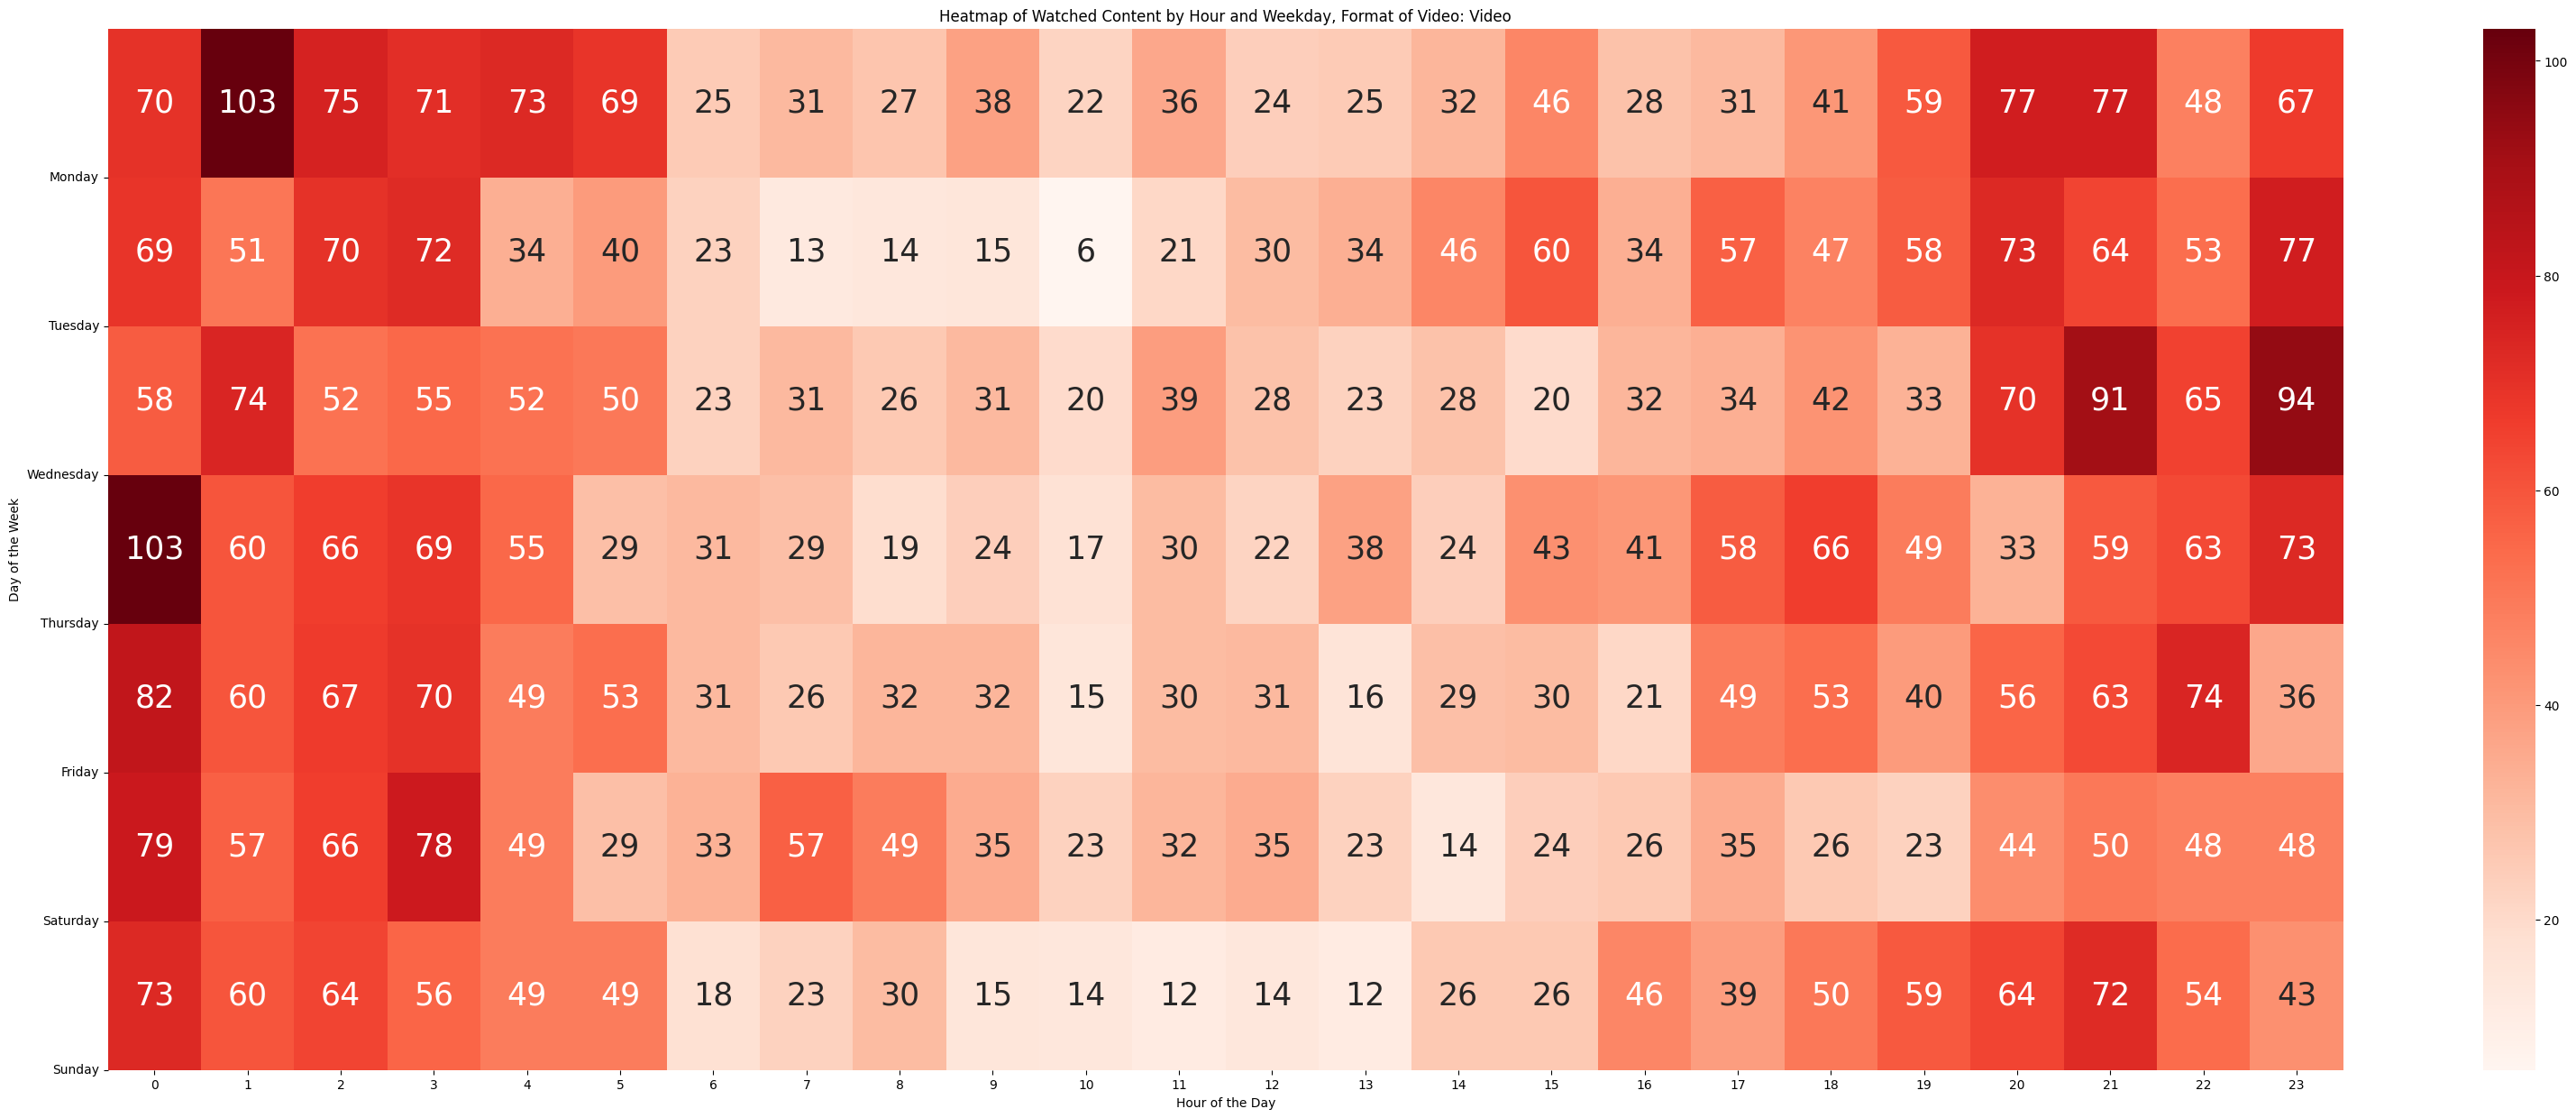

In [18]:
#Heatmap of Long Format videos according to weekday and hour of the day.
createHeatMap("Video")

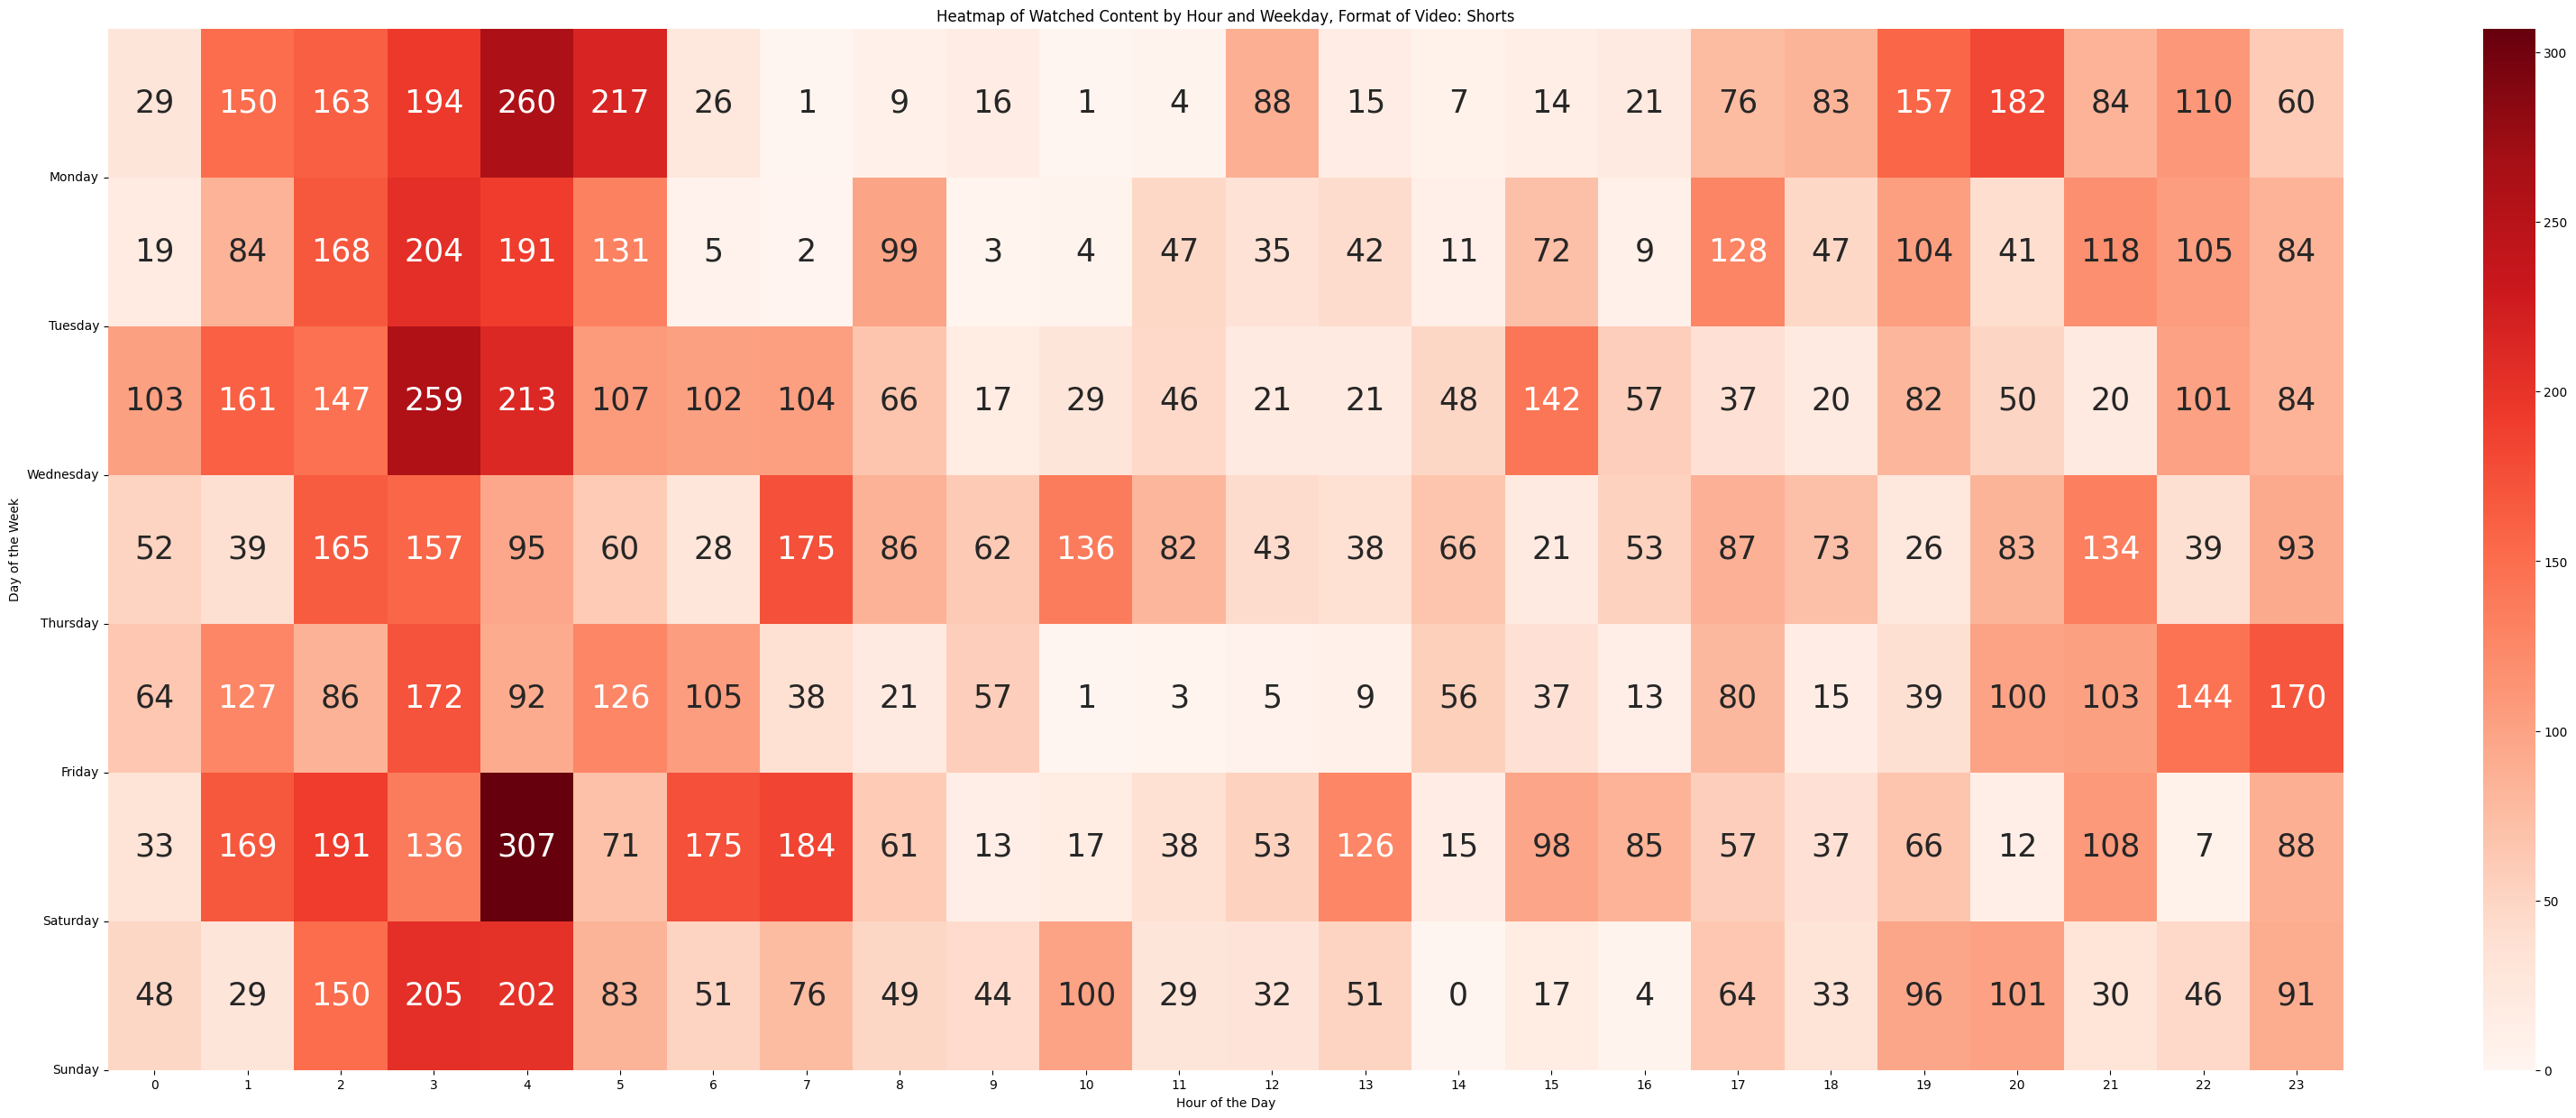

In [19]:
#Heatmap of Short Format videos according to weekday and hour of the day.

createHeatMap("Shorts")

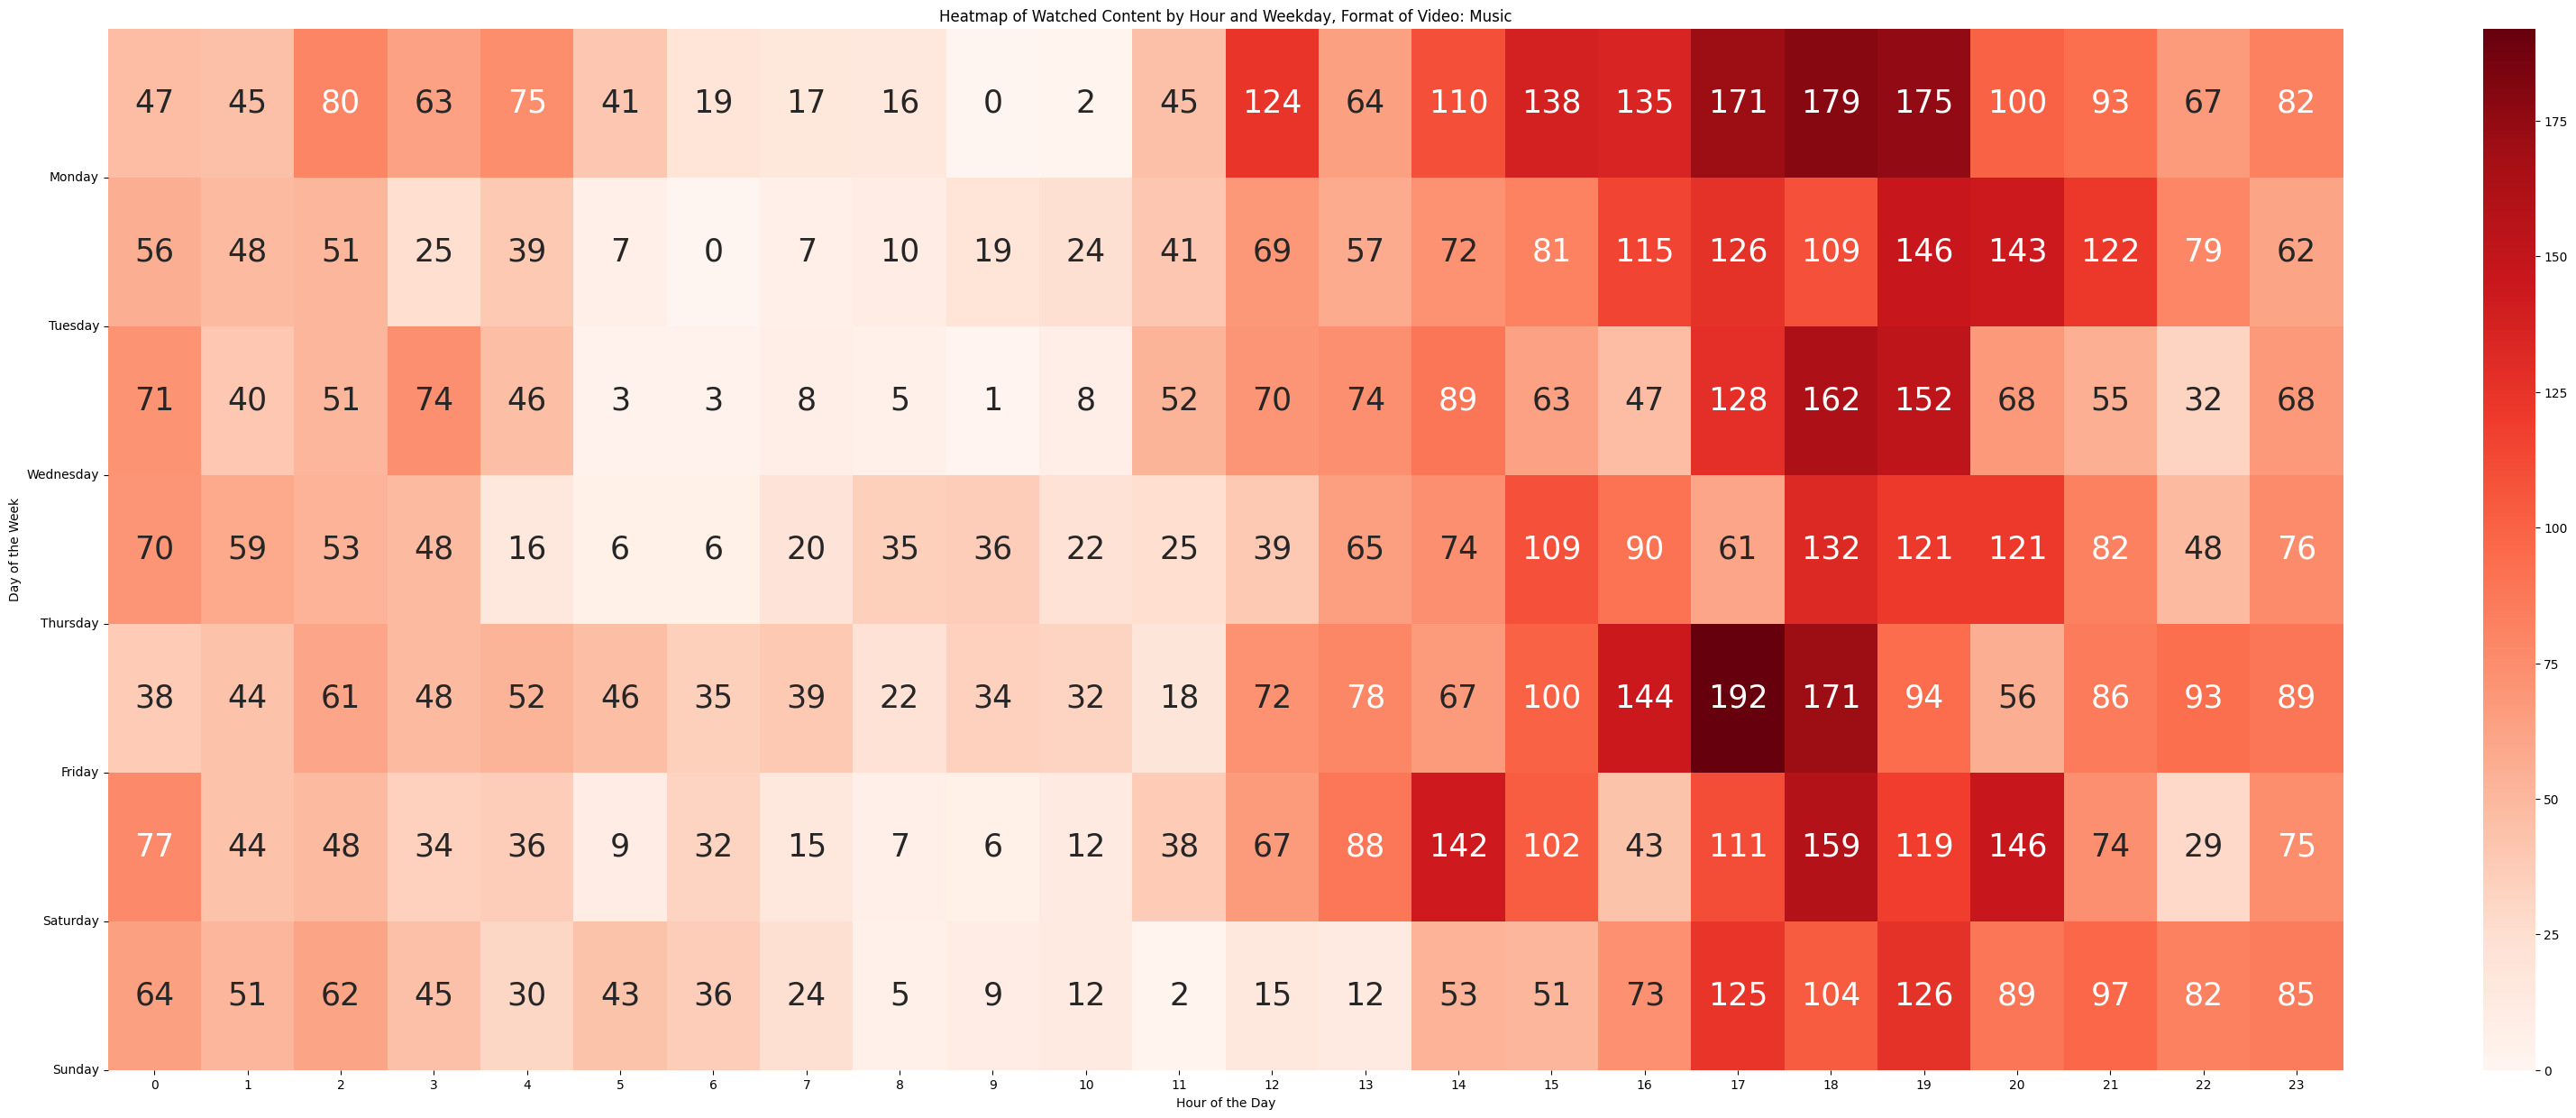

In [20]:
#Heatmap of Music videos according to weekday and hour of the day.

createHeatMap("Music")

            Video Type     Month   Weekday      Hour
Video Type    1.000000  0.168936 -0.005564  0.160849
Month         0.168936  1.000000 -0.040936  0.011169
Weekday      -0.005564 -0.040936  1.000000 -0.030135
Hour          0.160849  0.011169 -0.030135  1.000000


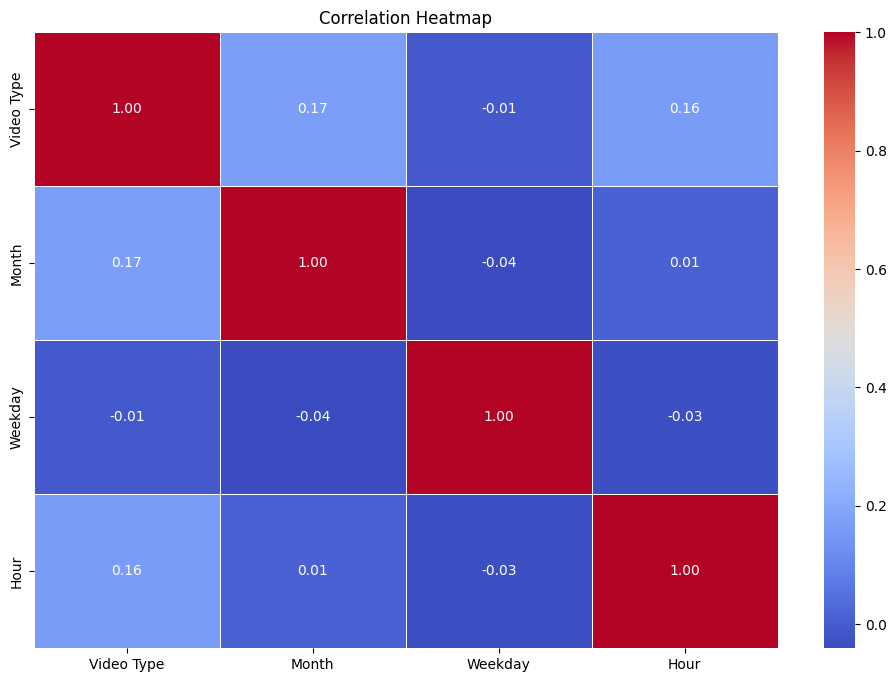

In [38]:
video_type_mapping = {
    'Video': 0,
    'Shorts': 1,
    'Music': 2
}

# Apply the mapping to the 'Video Type' column
df['Video Type'] = df['Video Type'].map(video_type_mapping)

correlation_matrix = df[["Video Type","Month","Weekday","Hour"]].corr()
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

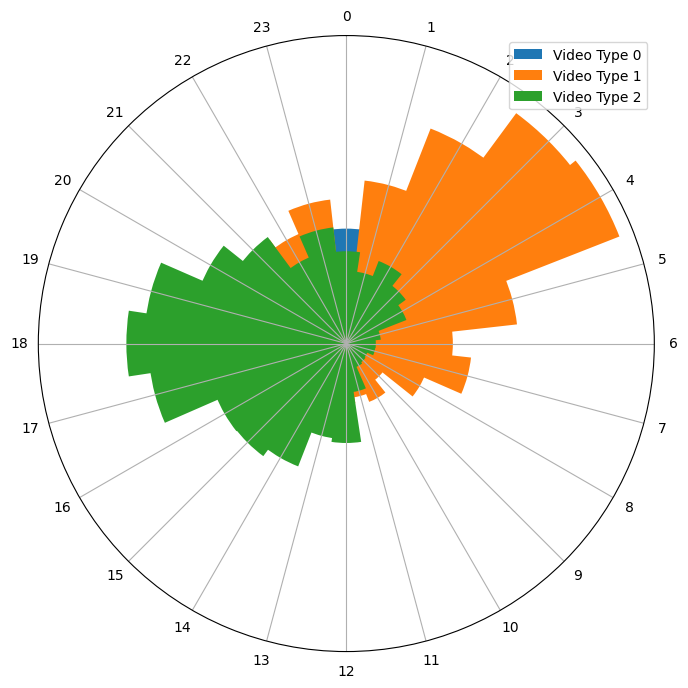

In [23]:
import numpy as np

data = df.groupby(['Hour', 'Video Type']).size().reset_index(name='Count')

# Creating a circular plot
num_types = df['Video Type'].nunique()
theta = np.linspace(0.0, 2 * np.pi, 24, endpoint=False)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
bars = []

for video_type in range(num_types):
    heights = data[data['Video Type'] == video_type]['Count']
    bars = ax.bar(theta, heights, width=0.3, bottom=video_type * 3, label=f'Video Type {video_type}')

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks(theta)
ax.set_xticklabels(range(24))
ax.set_yticks([])
ax.legend(loc='upper right')

plt.show()

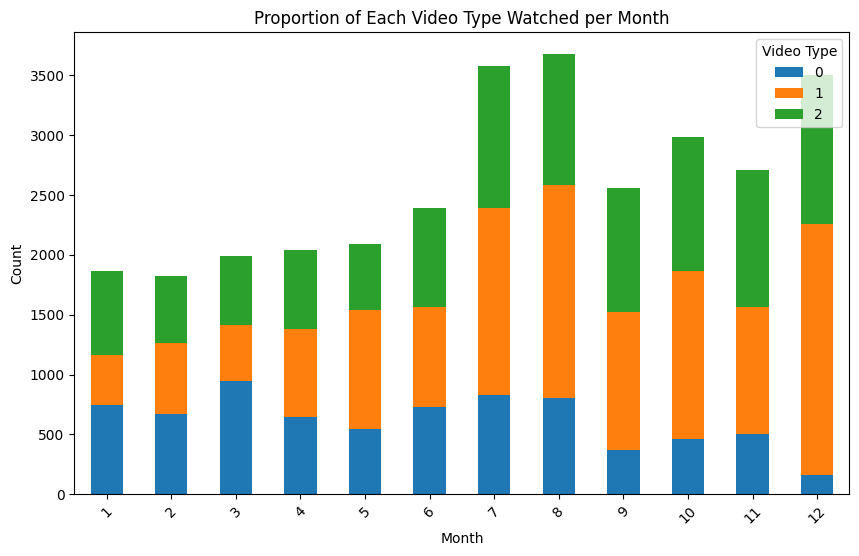

In [31]:
grouped_df = df.groupby(['Month', 'Video Type']).size().reset_index(name='Count')

# Pivot the DataFrame to get the counts of each video type per month
pivot_df = grouped_df.pivot_table(index='Month', columns='Video Type', values='Count', fill_value=0)

# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title("Proportion of Each Video Type Watched per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Video Type", loc="upper right")
plt.show()


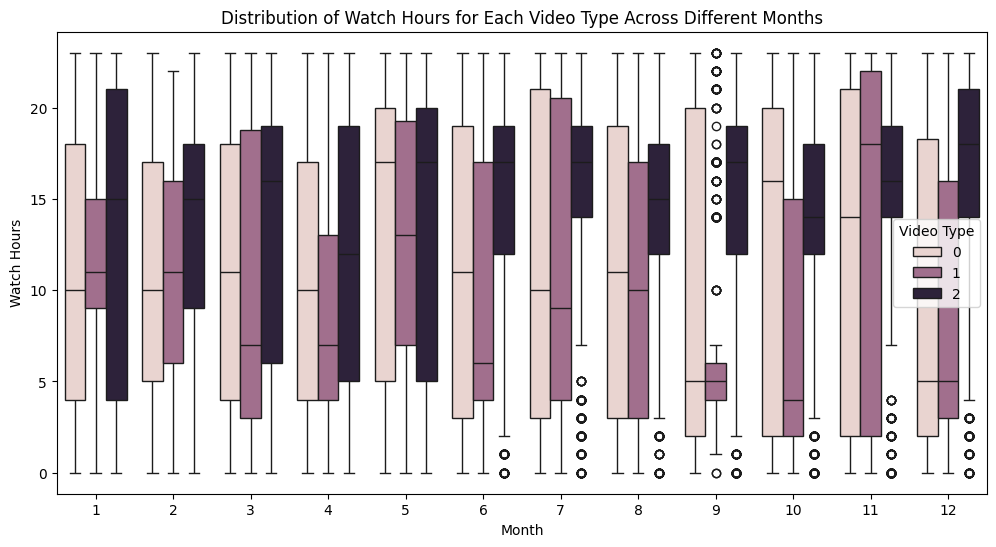

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Hour', hue='Video Type', data=df)

plt.title("Distribution of Watch Hours for Each Video Type Across Different Months")
plt.xlabel("Month")
plt.ylabel("Watch Hours")
plt.legend(title="Video Type")
plt.show()